In [1]:
from torcheeg.datasets import SEEDDataset
from torcheeg import transforms
from torcheeg.datasets.constants import SEED_CHANNEL_LOCATION_DICT

dataset = SEEDDataset(root_path='./SEED/SEED_EEG/Preprocessed_EEG',
                      io_path = 'E:/FYP/Egg-Based Emotion Recognition/EEg-based-Emotion-Recognition/.torcheeg/datasets_1732642665062_seDY1',
                      offline_transform=transforms.Compose([
                          transforms.BandDifferentialEntropy(),
                          transforms.ToGrid(SEED_CHANNEL_LOCATION_DICT)
                      ]),
                      online_transform=transforms.ToTensor(),
                      label_transform=transforms.Compose([
                          transforms.Select('emotion'),
                          transforms.Lambda(lambda x: x + 1)
                      ]),
                      num_worker=4)
print(dataset[0])

[2024-12-11 22:40:59] INFO (torcheeg/MainThread) 🔍 | Detected cached processing results, reading cache from E:/FYP/Egg-Based Emotion Recognition/EEg-based-Emotion-Recognition/.torcheeg/datasets_1732642665062_seDY1.


(tensor([[[ 0.0000,  0.0000,  0.0000,  5.1832,  5.0887,  4.9807,  0.0000,
           0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  4.5553,  0.0000,  4.2643,  0.0000,
           0.0000,  0.0000],
         [ 4.2014,  4.0099,  3.8065,  3.8590,  3.7828,  3.7195,  3.3290,
           3.8660,  3.5138],
         [ 3.5574,  3.8370,  3.1473,  3.1314,  3.4455,  2.8615,  2.8605,
           3.1997,  4.4979],
         [ 3.8301,  3.7472,  3.4873,  2.9300, -0.5460,  2.4503,  3.2057,
           3.7392,  4.5785],
         [ 3.8620,  3.5352,  3.4424,  3.1226, -0.6533,  2.3607,  3.8760,
           4.0473,  4.4404],
         [ 3.9283,  3.7993,  3.6490,  4.5985,  3.1423,  3.5070,  3.8388,
           4.3632,  4.5748],
         [ 0.0000,  4.0628,  4.0962,  3.8834,  3.8629,  4.1004,  4.5013,
           4.5144,  0.0000],
         [ 0.0000,  0.0000,  4.2134,  4.0241,  4.0828,  4.3369,  4.3554,
           0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  4.1442,  3.9311,  3.9702,  0.0000,
      

In [2]:

from torch.utils.data import Dataset, DataLoader, random_split
import torch
import os

class EEGDataset(Dataset):
    def __init__(self, data_dir):
        self.file_list = sorted(os.listdir(data_dir))
        self.data_dir = data_dir

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        file_path = os.path.join(self.data_dir, self.file_list[idx])
        sample = torch.load(file_path, map_location='cpu')  # Load on CPU first
        eeg = sample['eeg'].float()  # Ensure correct data type
        label = sample['label']  # Ensure label is of type long for classification
        return eeg, label



In [3]:
data_dir = "E:/FYP/Egg-Based Emotion Recognition/EEg-based-Emotion-Recognition/processed_eeg_data"
dataset = EEGDataset(data_dir)

# split dataset
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True , pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False , pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False , pin_memory=True)


In [4]:
## debugging 
for i in range(5):
    eeg, label = dataset[i]
    print(f"samples {i}: {eeg.shape}, {label}")

samples 0: torch.Size([4, 9, 9]), 2
samples 1: torch.Size([4, 9, 9]), 2
samples 2: torch.Size([4, 9, 9]), 2
samples 3: torch.Size([4, 9, 9]), 2
samples 4: torch.Size([4, 9, 9]), 1


C:\Users\hamza\AppData\Local\Temp\ipykernel_16592\1540518134.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sample = torch.load(file_path, map_location='cpu')  # Load 

In [5]:
## debugging
print(f"Training size: {len(train_dataset)}, Validation size: {len(val_dataset)}, Test size: {len(test_dataset)}")


Training size: 106911, Validation size: 30546, Test size: 15273


In [6]:
for eeg_batch, label_batch in train_loader:
    print(f"Batch shape: {eeg_batch.shape}, Labels: {label_batch}")
    break


C:\Users\hamza\AppData\Local\Temp\ipykernel_16592\1540518134.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sample = torch.load(file_path, map_location='cpu')  # Load 

Batch shape: torch.Size([64, 4, 9, 9]), Labels: tensor([1, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 1, 2, 2,
        1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2,
        1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 2])


In [7]:
import torch.nn as nn

class DEBaseEncoder(nn.Module):
    def __init__(self):
        super(DEBaseEncoder, self).__init__()
        self.conv1 = nn.Conv2d(4, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(32*4,128)
        
    def forward(self, x):
        #  print(f"Input to encoder: {x.shape}")
         x = self.pool(nn.ReLU()(self.conv1(x)))
        #  print(f"After conv1: {x.shape}")
         x = self.pool(nn.ReLU()(self.conv2(x)))
        #  print(f"After conv2: {x.shape}")
         x = x.view(x.size(0), -1)  # Flatten
        #  print(f"Flattened Shape: {x.shape}")
         x = nn.ReLU()(self.fc(x))
         return x

In [ ]:
## Debugging base encoder
encoder = DEBaseEncoder().cuda()
eeg_batch, _ = next(iter(train_loader))
eeg_batch = eeg_batch.cuda()

print(f"Input shape to encoder: {eeg_batch.shape}")
encoder_output = encoder(eeg_batch)
print(f"Encoder output shape: {encoder_output.shape}")

In [8]:
class projector (nn.Module):
    def __init__(self, input_dim=128, output_dim=64):
        super(projector, self).__init__()
        self.project = nn.Sequential(
            nn.Linear(input_dim,output_dim),
            nn.ReLU(),
            nn.Linear(output_dim,output_dim)
        )
    def forward(self, x):
        # print(f"Input to projector: {x.shape}")
        x = self.project(x)
        # print(f"Output of projector: {x.shape}")
        return x

In [ ]:
## Debugging Projector 
projector = projector().cuda()
encoder_output = encoder(eeg_batch)  # Output from debugged encoder
print(f"Encoder output shape: {encoder_output.shape}")

projector_output = projector(encoder_output)
print(f"Projector output shape: {projector_output.shape}")  # Expected: [Batch, 64]


In [9]:
class EmotionClassifier(nn.Module):
    def __init__(self, input_dim=128, num_classes=3):
        super(EmotionClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.classifier(x)


In [10]:
class ContrastiveLoss(nn.Module):
    def __init__(self, temperature=0.1):
        super(ContrastiveLoss, self).__init__()
        self.temperature = temperature

    def forward(self, z_i, z_j):
        z_i = nn.functional.normalize(z_i, dim=1)
        z_j = nn.functional.normalize(z_j, dim=1)
        similarity_matrix = torch.matmul(z_i, z_j.T) / self.temperature
        # print(f"Similarity Matrix: {similarity_matrix.shape}")
        labels = torch.arange(z_i.size(0)).to(z_i.device)
        # print(f"Labels: {labels.shape}")
        loss = nn.CrossEntropyLoss()(similarity_matrix, labels)
        # print(f"Contrastive Loss: {loss}")
        return loss


In [ ]:
## debugging contrastiveLoss
contrastive_loss = ContrastiveLoss().cuda()
z_i = projector(encoder(eeg_batch))  # Representation 1
z_j = projector(encoder(eeg_batch))  # Representation 2 (positive pair in this case)

# Print shapes
print(f"z_i shape: {z_i.shape}, z_j shape: {z_j.shape}")  # Both should be [Batch, 64]

# Compute similarity and loss
loss = contrastive_loss(z_i, z_j)
print(f"Contrastive loss: {loss.item()}")


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from torch.utils.tensorboard import SummaryWriter
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
encoder = DEBaseEncoder().to(device)
projector = projector().to(device)
contrastive_loss = ContrastiveLoss().to(device)
print(next(encoder.parameters()).device)
print(next(projector.parameters()).device)
optimizer = torch.optim.Adam(list(encoder.parameters()) + list(projector.parameters()), lr=0.001)

writer = SummaryWriter(log_dir="E:/FYP/Egg-Based Emotion Recognition/EEg-based-Emotion-Recognition/runs/contrastive_training")

for epoch in range(5):
    encoder.train()
    projector.train()
    total_loss = 0

    for batch_idx, (eeg, _) in enumerate(train_loader):
        eeg = eeg.float().to(device)
        print(f"Batch {batch_idx + 1}: EEG Device - {eeg.device}")

        # Positive pair (augmentations or duplicates in preprocessed dataset)
        z_i = projector(encoder(eeg))
        print(f"z_i Device: {z_i.device}")
        z_j = projector(encoder(eeg))
        print(f"Loss Device: {z_j.device}")

        # Compute contrastive loss
        loss = contrastive_loss(z_i, z_j)
        print(f"Loss Device: {loss.device}")
        total_loss += loss.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        
        for name, param in encoder.named_parameters():
            if param.grad is not None:
                writer.add_scalar(f"Gradients/{name}", param.grad.norm(), epoch * len(train_loader) + batch_idx)
       
        optimizer.step()
        print(f"Epoch {epoch + 1}, Batch {batch_idx + 1}/{len(train_loader)}, Loss: {loss.item():.4f}")

        # Log loss to TensorBoard
        writer.add_scalar("Pretraining Loss", loss.item(), epoch * len(train_loader) + batch_idx)

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader):.4f}")
    
writer.close()


In [11]:
import torch
# Load the checkpoint
checkpoint = torch.load("pretraining_checkpoint.pth")
encoder = DEBaseEncoder().cuda()
projector = projector().cuda()
optimizer = torch.optim.Adam(list(encoder.parameters()) + list(projector.parameters()), lr=0.001)


# Restore states
encoder.load_state_dict(checkpoint["encoder_state_dict"])
projector.load_state_dict(checkpoint["projector_state_dict"])
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
start_epoch = checkpoint["epoch"]
loss = checkpoint["loss"]

print(f"Checkpoint loaded. Resuming from epoch {start_epoch} with loss {loss:.4f}.")


C:\Users\hamza\AppData\Local\Temp\ipykernel_16592\2396463206.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("pretraining_checkpoint.pth")


Checkpoint loaded. Resuming from epoch 5 with loss 0.0129.


In [12]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(log_dir="./runs/contrastive_training")
classifier = EmotionClassifier().cuda()
optimizer = torch.optim.Adam(list(encoder.parameters()) + list(classifier.parameters()), lr=0.001)
criterion = nn.CrossEntropyLoss()

writer = SummaryWriter(log_dir="./runs/fine_tuning")

for epoch in range(10):
    encoder.train()
    classifier.train()
    total_loss = 0
    correct = 0
    total = 0

    for batch_idx, (eeg, label) in enumerate(train_loader):
        eeg, label = eeg.cuda(), label.cuda()

        # Forward pass
        features = encoder(eeg)
        outputs = classifier(features)
        loss = criterion(outputs, label)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += label.size(0)
        correct += (predicted == label).sum().item()

        # Log loss and accuracy to TensorBoard
        writer.add_scalar("Training Loss", loss.item(), epoch * len(train_loader) + batch_idx)
        writer.add_scalar("Training Accuracy", 100 * correct / total, epoch * len(train_loader) + batch_idx)

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader):.4f}, Accuracy: {correct / total * 100:.2f}%")


C:\Users\hamza\AppData\Local\Temp\ipykernel_16592\1540518134.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sample = torch.load(file_path, map_location='cpu')  # Load 

Epoch 1, Loss: 0.7513, Accuracy: 63.50%
Epoch 2, Loss: 0.5989, Accuracy: 73.08%
Epoch 3, Loss: 0.5237, Accuracy: 77.28%
Epoch 4, Loss: 0.4699, Accuracy: 79.98%
Epoch 5, Loss: 0.4338, Accuracy: 81.86%
Epoch 6, Loss: 0.4058, Accuracy: 83.16%
Epoch 7, Loss: 0.3809, Accuracy: 84.42%
Epoch 8, Loss: 0.3640, Accuracy: 85.24%
Epoch 9, Loss: 0.3464, Accuracy: 85.97%
Epoch 10, Loss: 0.3320, Accuracy: 86.60%


C:\Users\hamza\AppData\Local\Temp\ipykernel_16592\1540518134.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sample = torch.load(file_path, map_location='cpu')  # Load 

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      5052
           1       0.80      0.87      0.83      5000
           2       0.91      0.90      0.91      5221

    accuracy                           0.85     15273
   macro avg       0.85      0.85      0.85     15273
weighted avg       0.86      0.85      0.85     15273



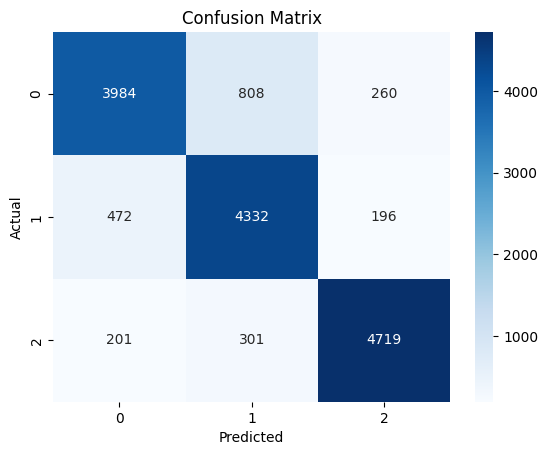

In [13]:
encoder.eval()
classifier.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for eeg, label in test_loader:
        eeg, label = eeg.cuda(), label.cuda()
        features = encoder(eeg)
        outputs = classifier(features)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(label.cpu().numpy())

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate metrics
print(classification_report(all_labels, all_preds))

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
